In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Bidirectional, RepeatVector, TimeDistributed, ConvLSTM2D
from sklearn.preprocessing import MinMaxScaler
import time

In [2]:
df = pd.read_csv('output2.csv')

<Axes: >

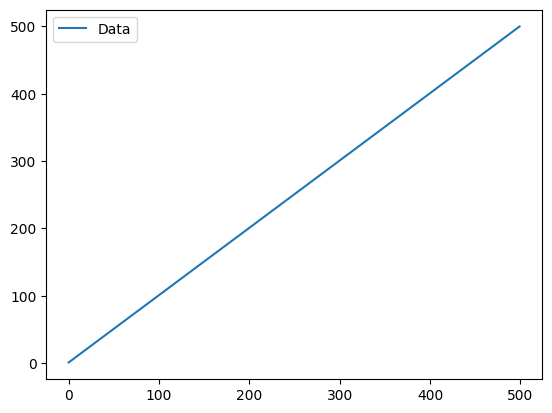

In [3]:
df.plot()

In [4]:
df.size

500

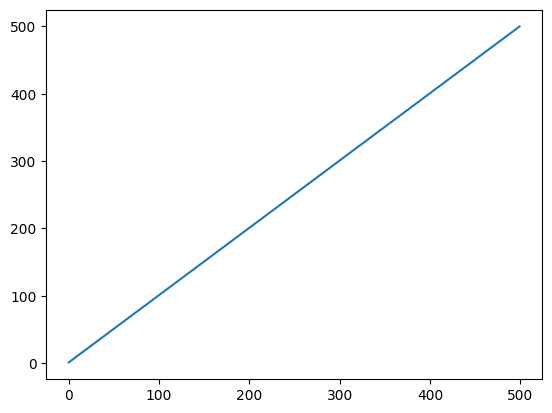

In [5]:
plt.plot(df)

In [6]:
# scaler = MinMaxScaler(feature_range=(0, 1)) #Also try QuantileTransformer
# dataset = scaler.fit_transform(df)

In [7]:
train_size = int(len(df) * 0.80)
test_size = len(df) - train_size
train, test = df[0:train_size], df[train_size:len(df)]
test.shape

(100, 1)

In [8]:
def to_sequences(dataset, time_window,output):
    x = []
    y = []

    for i in range(len(dataset)-time_window-1-output):
        #print(i)
        window = dataset[i:(i+time_window)]
        x.append(window)
        y.append(dataset[i+time_window:i+time_window+output])

    return np.array(x),np.array(y)

In [9]:
time_window = 5
output=2 # Number of time steps to look back
#Larger sequences (look further back) may improve forecasting.

trainX, trainY = to_sequences(train, time_window, output)
testX, testY = to_sequences(test, time_window,output)

In [10]:
trainY.shape

(392, 2, 1)

In [11]:
trainX = trainX.reshape((trainX.shape[0], trainX.shape[1], 1))
print(trainX.shape)
testX = testX.reshape((testX.shape[0], testX.shape[1], 1))
print(testX.shape)
# trainY = trainY.reshape((trainY.shape[0], trainY.shape[1], 1))
# print(trainY.shape)
# testY= testY.reshape((testY.shape[0], testY.shape[1], 1))
# print(testY.shape)

(392, 5, 1)
(92, 5, 1)


In [12]:
import tensorflow as tf

In [13]:
model = Sequential()
# model.add(LSTM(10, activation='relu',return_sequences=True,input_shape=(time_window,1)))
model.add(LSTM(100, activation='elu',input_shape=(time_window,1)))
model.add(RepeatVector(output))
model.add(LSTM(100, activation='elu', return_sequences=True))
model.add(TimeDistributed(Dense(1,activation='elu')))

model.compile(optimizer='adam', loss='mse')
model.summary()

C:\Users\Thinkbiz\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100)                 │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ (None, 2, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 2, 100)              │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 2, 1)                │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,301 (473.83 KB)

 Trainable params: 121,301 (473.83 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
import keras

In [15]:
# callback = keras.callbacks.EarlyStopping(monitor='loss',patience=3)

In [16]:
model.fit(trainX, trainY, epochs=100,validation_data=(testX,testY))

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 51001.4609 - val_loss: 123781.0625
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22706.4062 - val_loss: 22899.7012
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4548.7734 - val_loss: 3128.3220
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 345.0759 - val_loss: 631.8338
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 85.2964 - val_loss: 97.6064
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.1254 - val_loss: 42.2729
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.7088 - val_loss: 12.8288
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.5148 - val_loss: 17.1055
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3808 - val_loss: 9.4631
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6692 - val_loss: 11.0048
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4269 - val_loss: 5.8416
Epoch 12/100
13/13 ━━━━━━━━━

In [17]:
model.save('my_test_model.keras')

In [18]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [19]:
trainPredict.shape

(392, 2, 1)

In [20]:
trainY.shape

(392, 2, 1)

In [21]:
trainPredict = trainPredict.reshape(trainPredict.shape[0],trainPredict.shape[1])
testPredict = testPredict.reshape(testPredict.shape[0],testPredict.shape[1])

In [22]:
x_test = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
x_test = x_test.reshape((-1,5,1))
print(x_test.shape)

(4, 5, 1)


In [23]:
yhat = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


In [24]:
yhat

array([[[ 5.7876782],
        [ 6.9925895]],

       [[11.046225 ],
        [12.039444 ]],

       [[15.970491 ],
        [17.075956 ]],

       [[21.03507  ],
        [22.078547 ]]], dtype=float32)